# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama : Ilham Oktavian
- Email : Ilhamoktavian74@gmail.com
- Id Dicoding : ilham_oktavian_74

## Persiapan

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Menyiapkan library yang dibutuhkan

Melakukan import library yang dibutuhkan untuk keseluruhan proyek.

In [59]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import joblib

## Data Understanding

* **EmployeeId** - Employee Identifier
* **Attrition** - Did the employee attrition? (0=no, 1=yes)
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Daily salary
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Hourly salary
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly salary
* **MonthlyRate** - Mounthly rate
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

In [60]:
# Load data
df = pd.read_csv('./drive/MyDrive/Dataset/data_HR.csv')

# Menampilkan 5 data teratas
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


In [61]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [62]:
# Menampilkan statistik
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Menangani missing value

In [63]:
# Melakukan cek terhadap kolom mana saja yang memiliki value Null
columns_with_nan = df.columns[df.isnull().any()].tolist()

# Membuat DataFrame untuk menampilkan kolom yang memiliki nilai null beserta tipe datanya
nan_info = pd.DataFrame({
    'Tipe Data': df[columns_with_nan].dtypes,
    'Jumlah Null': df[columns_with_nan].isnull().sum()
})

print("Kolom yang memiliki nilai Null beserta tipe datanya:")
print(nan_info)

Kolom yang memiliki nilai Null beserta tipe datanya:
          Tipe Data  Jumlah Null
Attrition   float64          412


In [64]:
# Menghapus kolom yang memiliki nilai null
df = df.dropna()

### Univariate Analysis

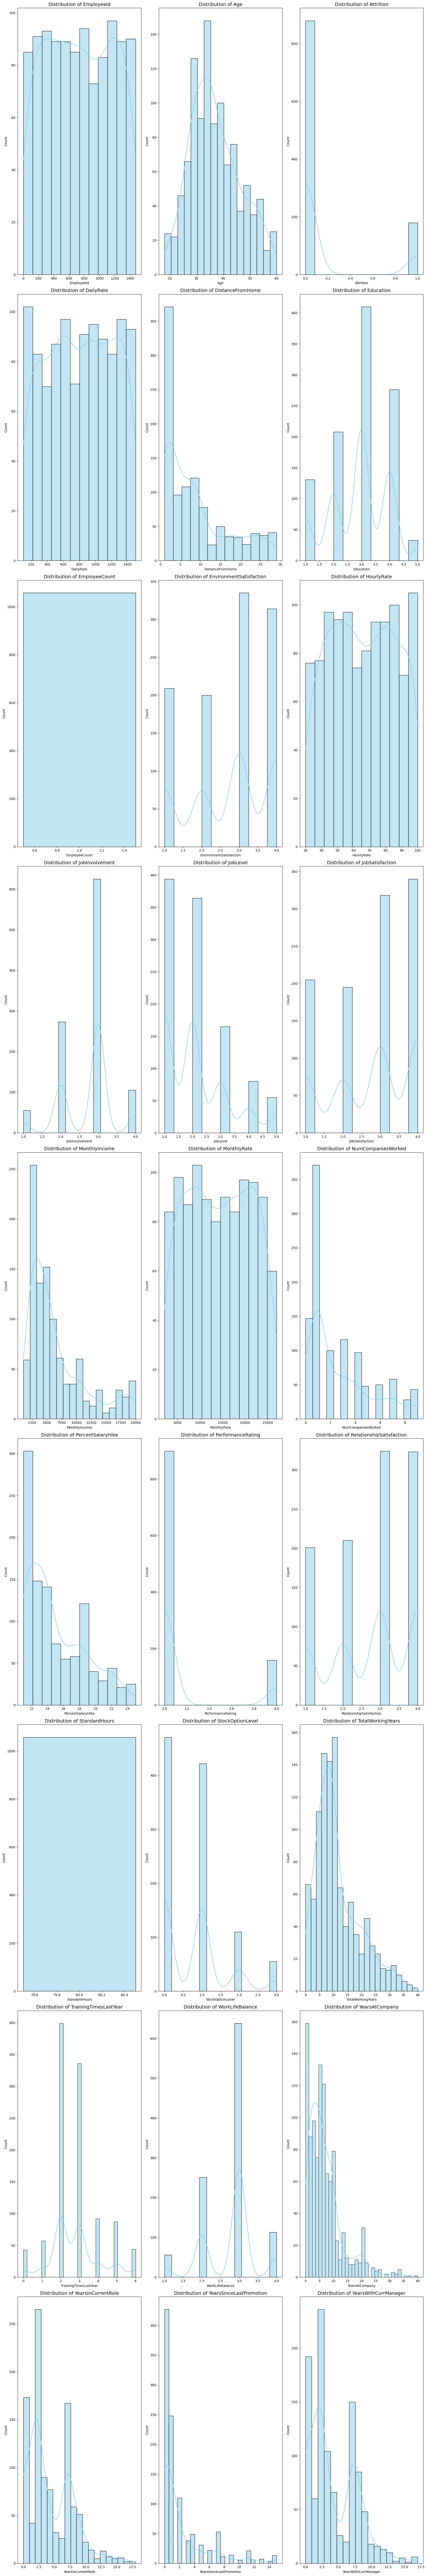

In [65]:
# Identifikasi kolom numerical
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Univariate analysis untuk numerical variables
plt.figure(figsize=(18, len(numerical_columns) * 4))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-66-a6058a65cd0f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-66-a6058a65cd0f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-66-a6058a65cd0f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
<ipython-input-66-a6058a65cd0f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

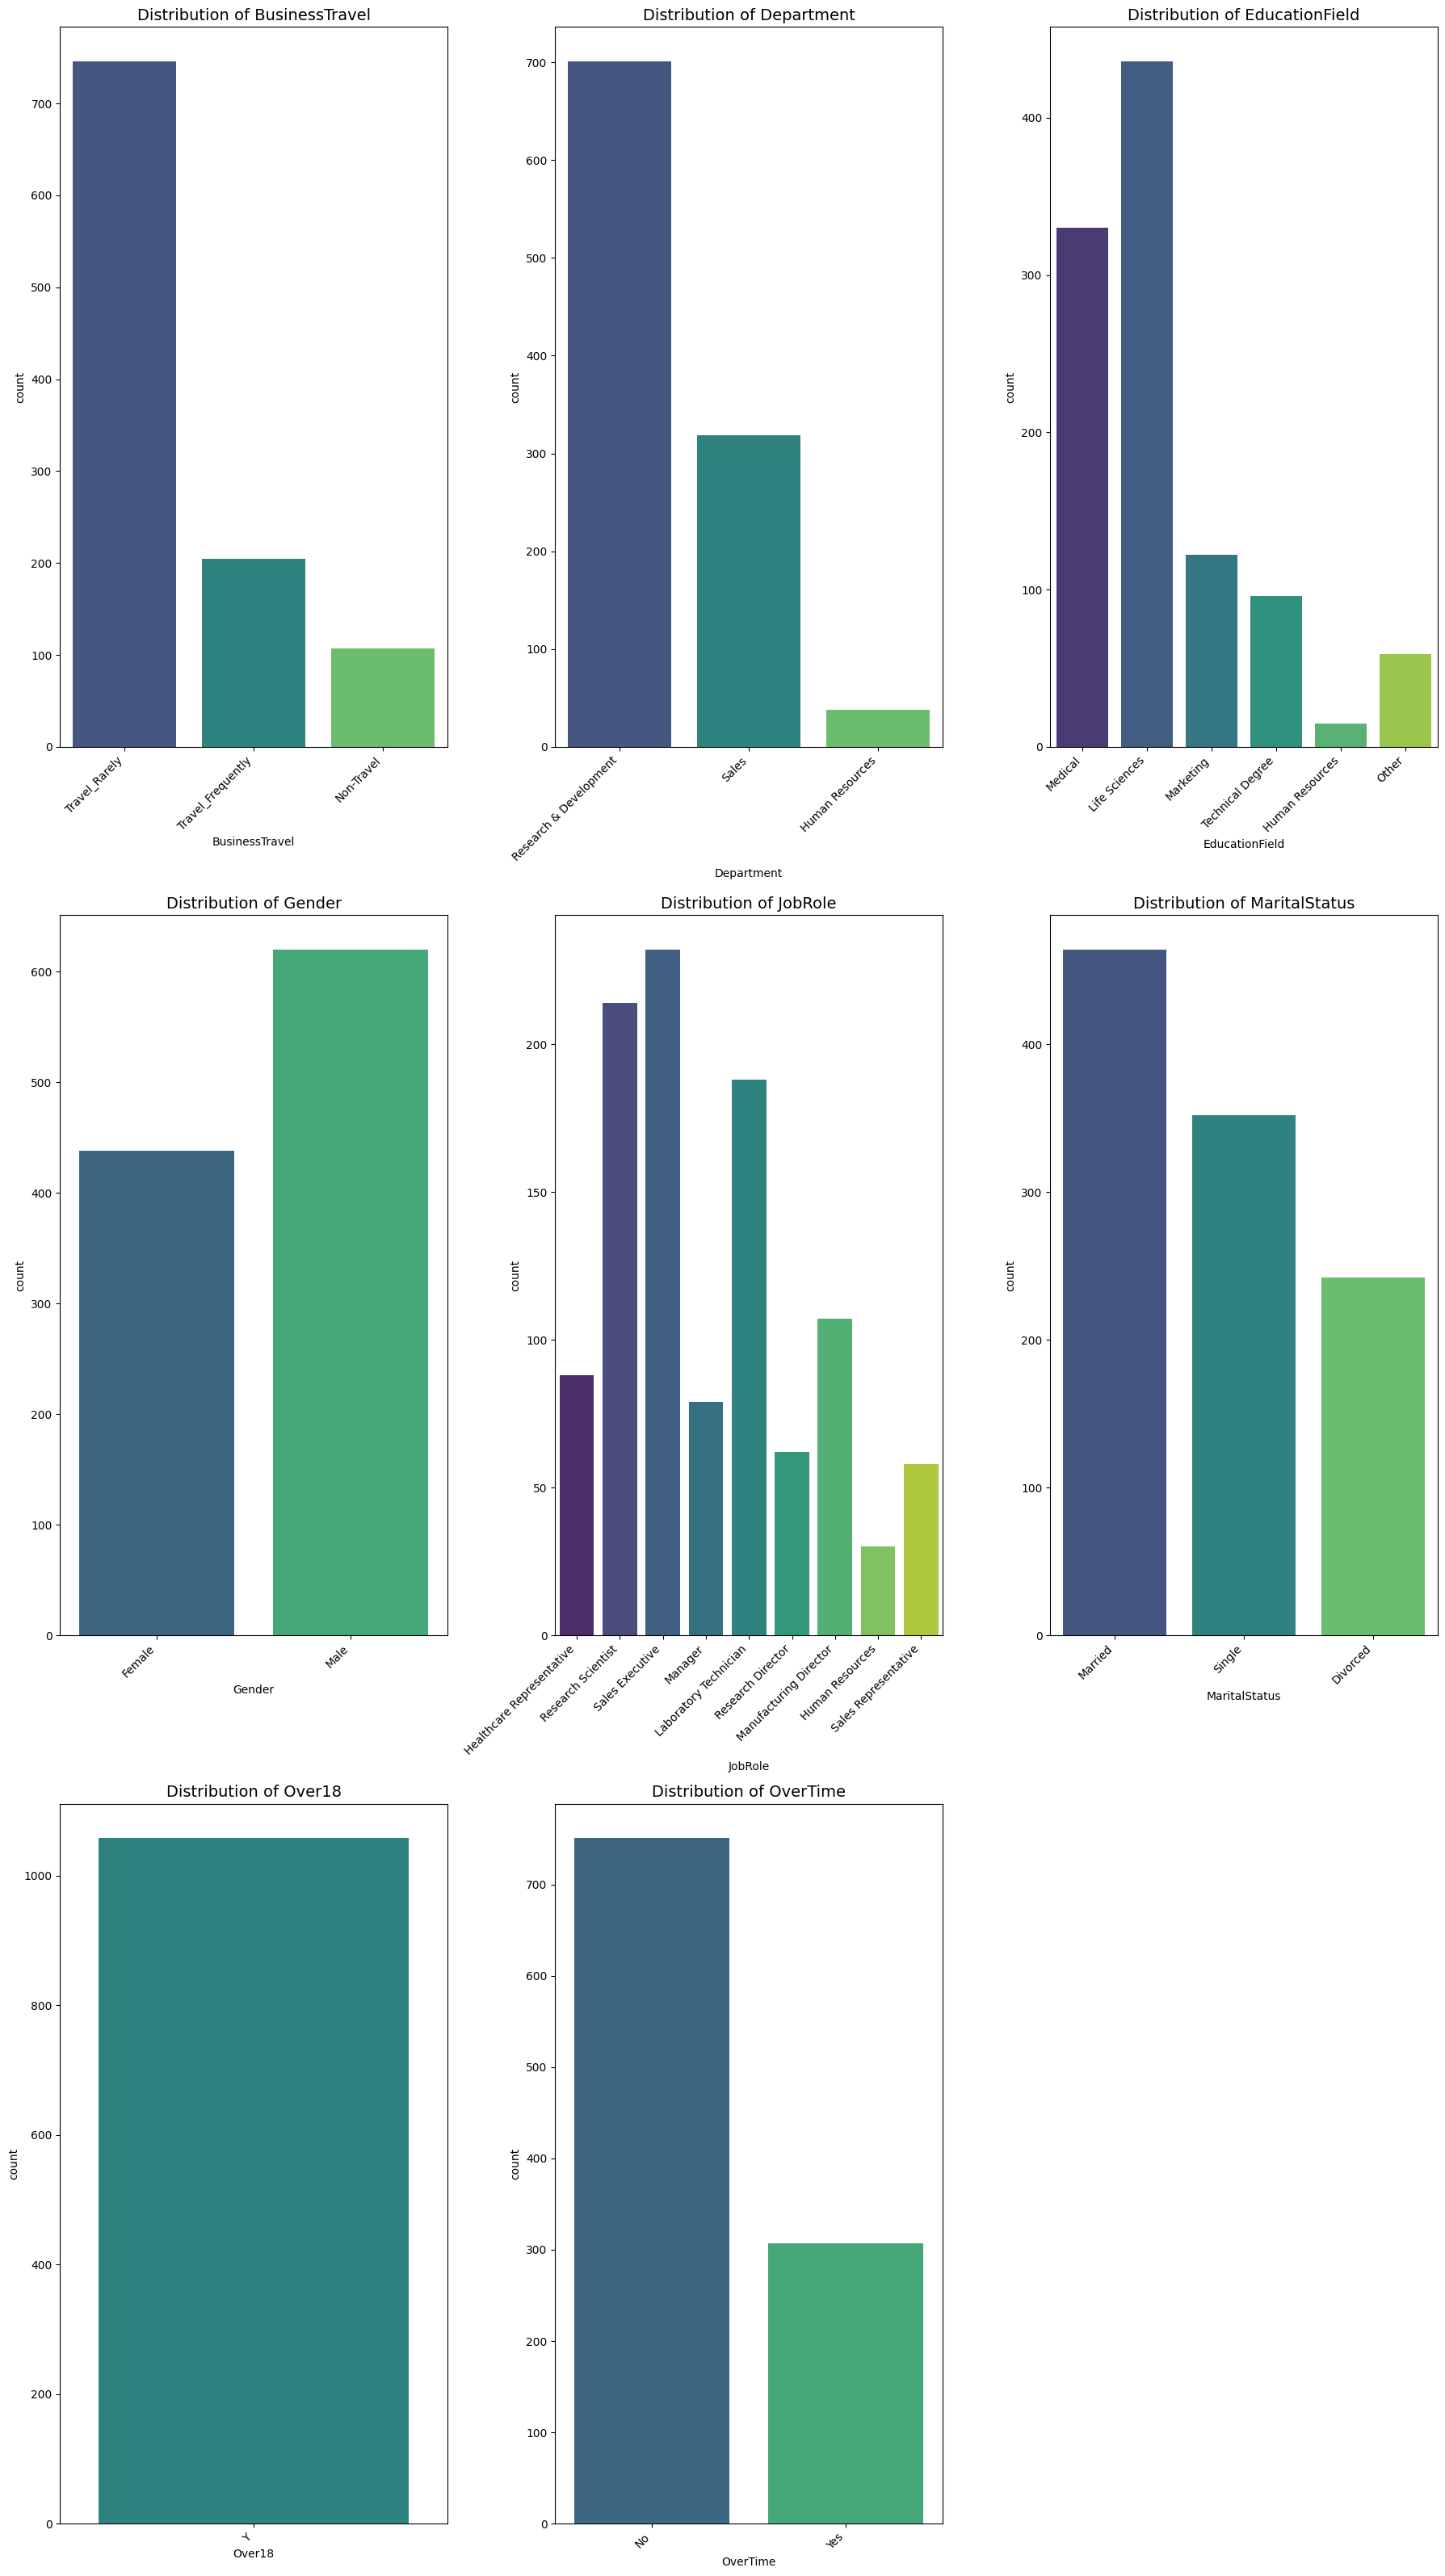

In [66]:
# Identifikasi kolom categorical
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Univariate analysis untuk categorical variables
plt.figure(figsize=(18, len(categorical_columns) * 4))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot((len(categorical_columns) + 2) // 3, 3, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [67]:
# Menghapus kolom `EmployeeCount`, `StandardHours`, dan `Over18` karena hanya memiliki satu nilai
df = df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)

### Multivariate Analysis

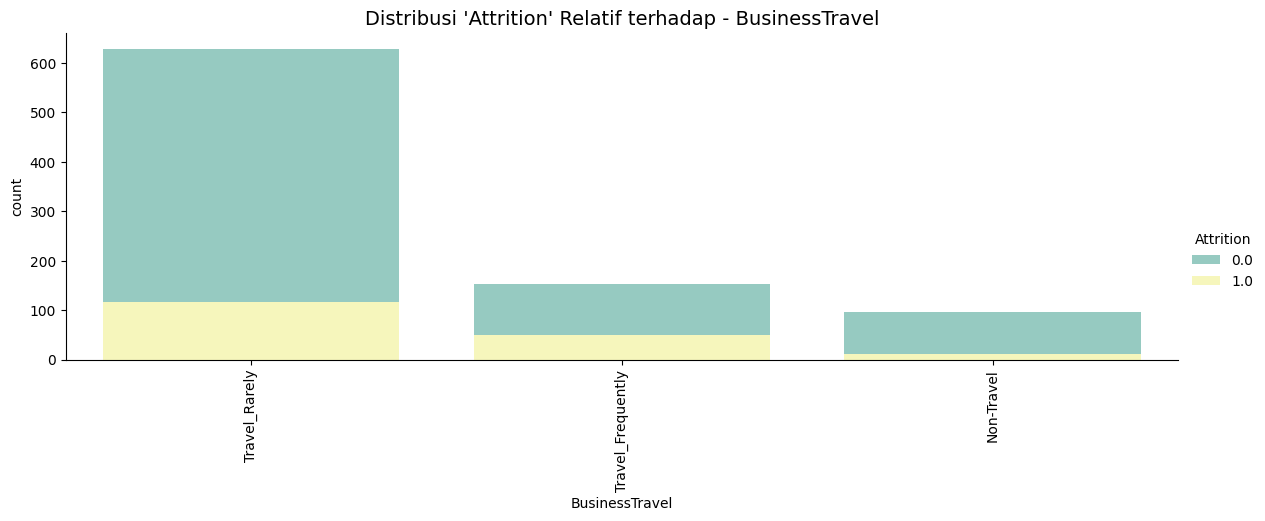

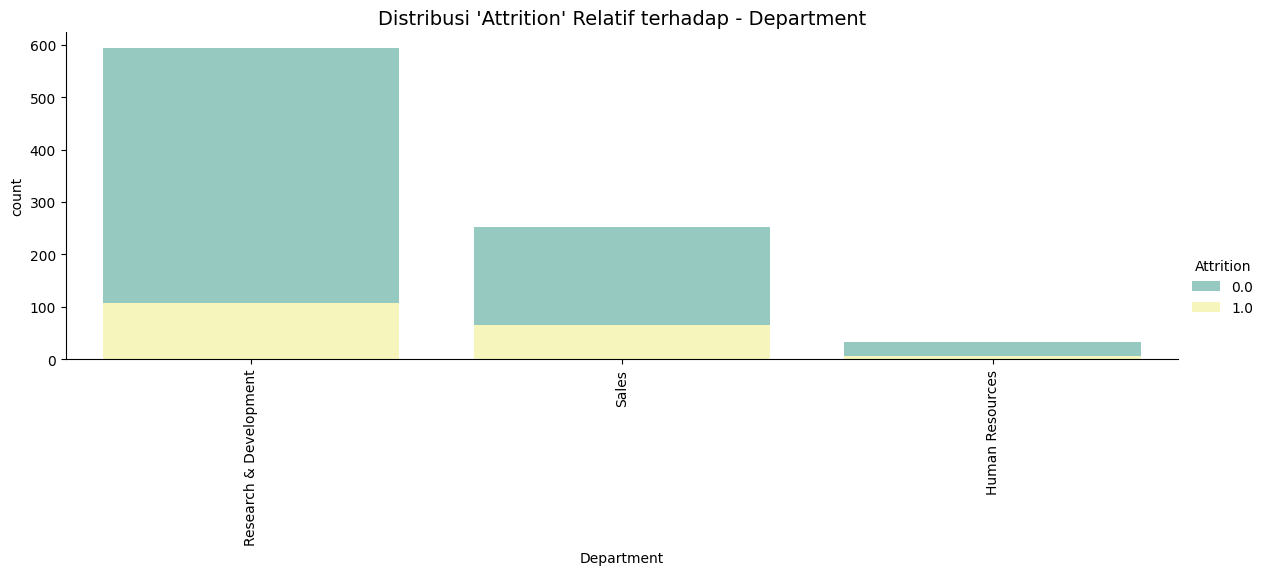

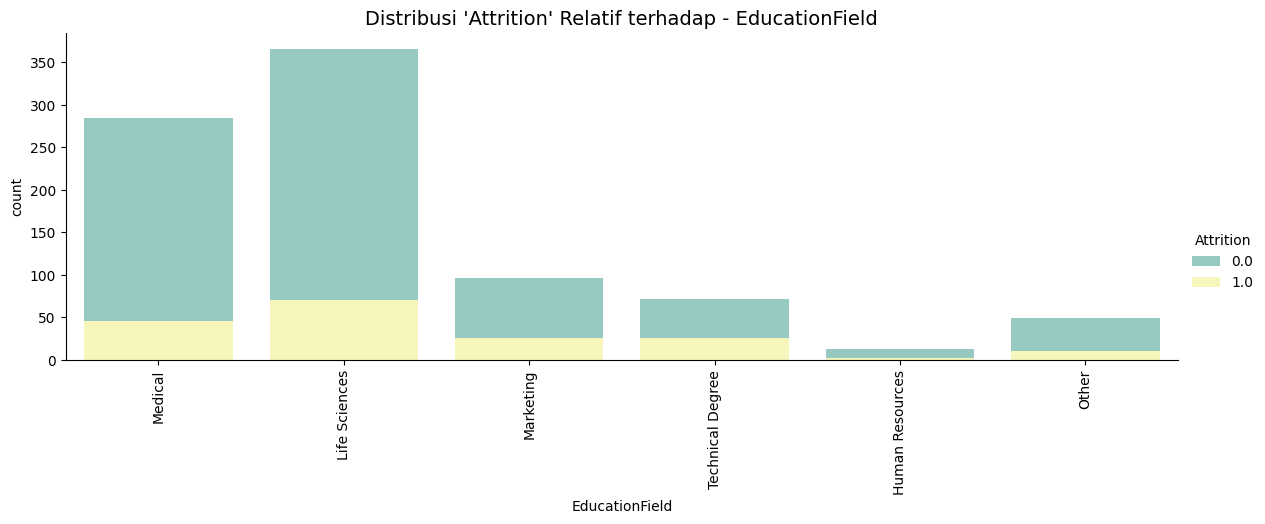

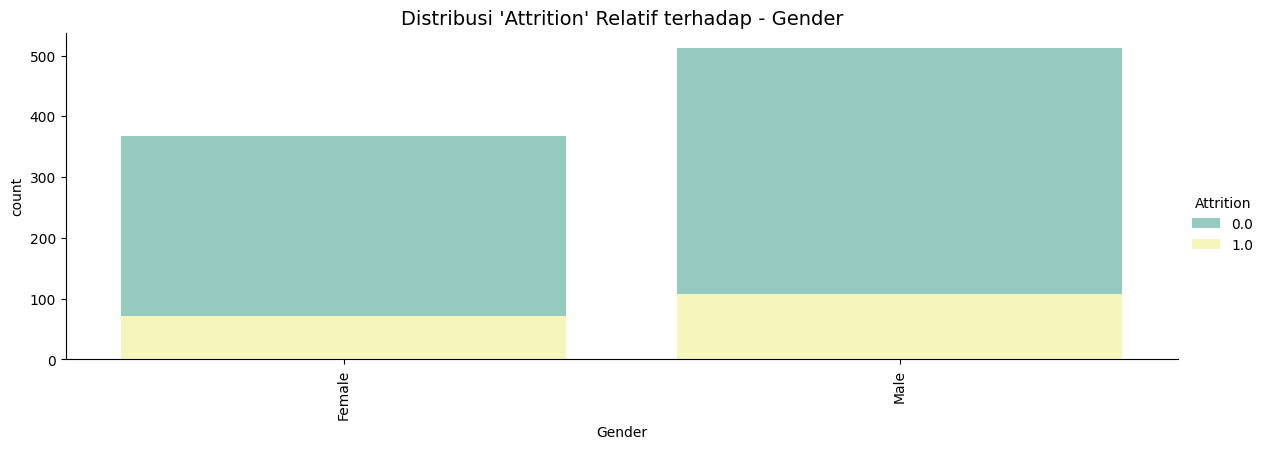

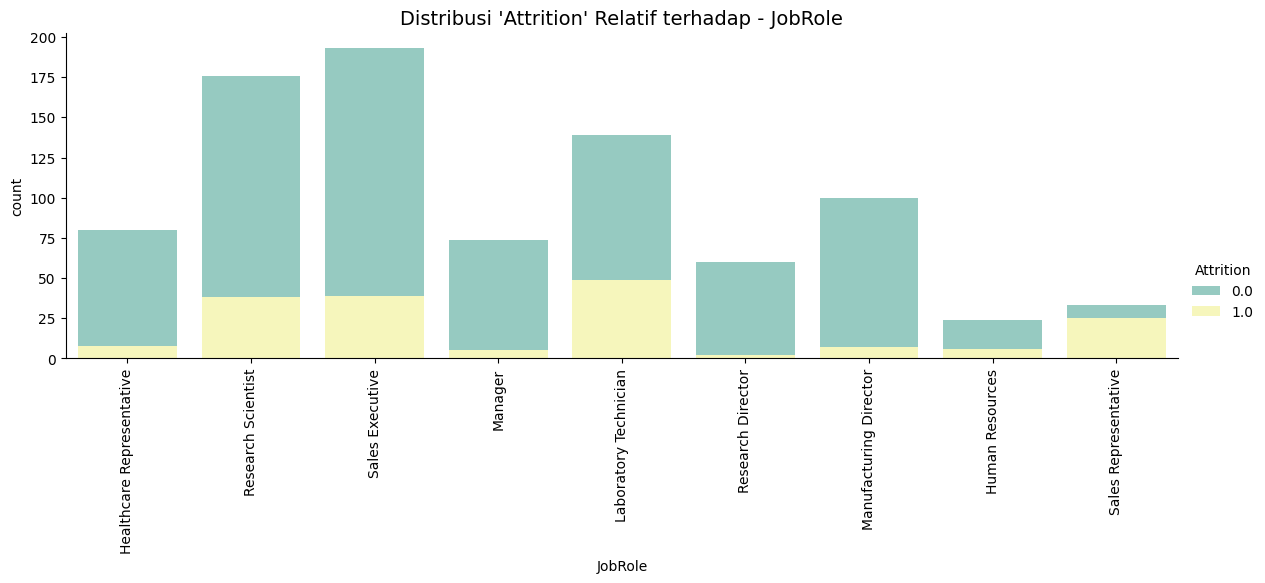

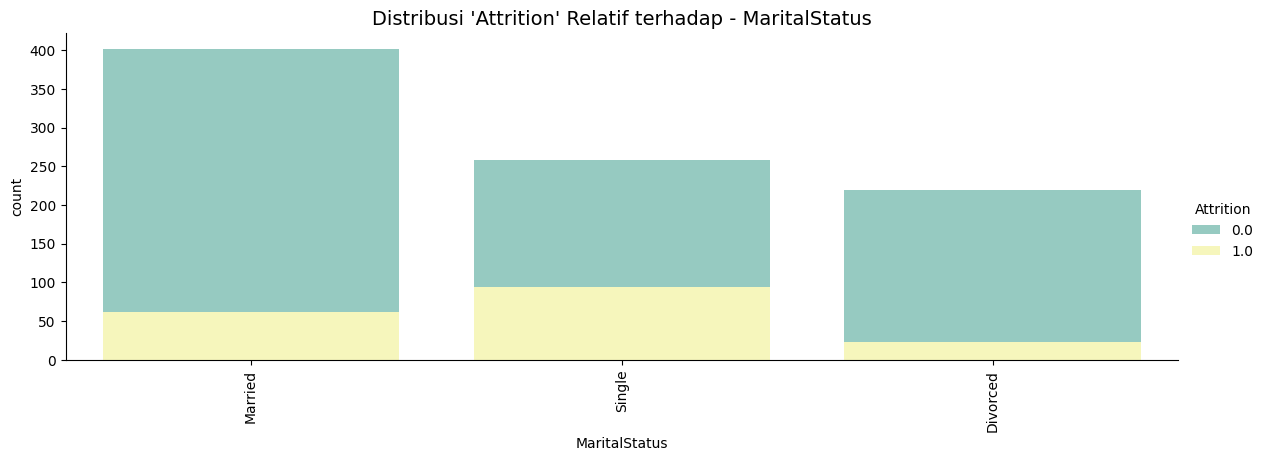

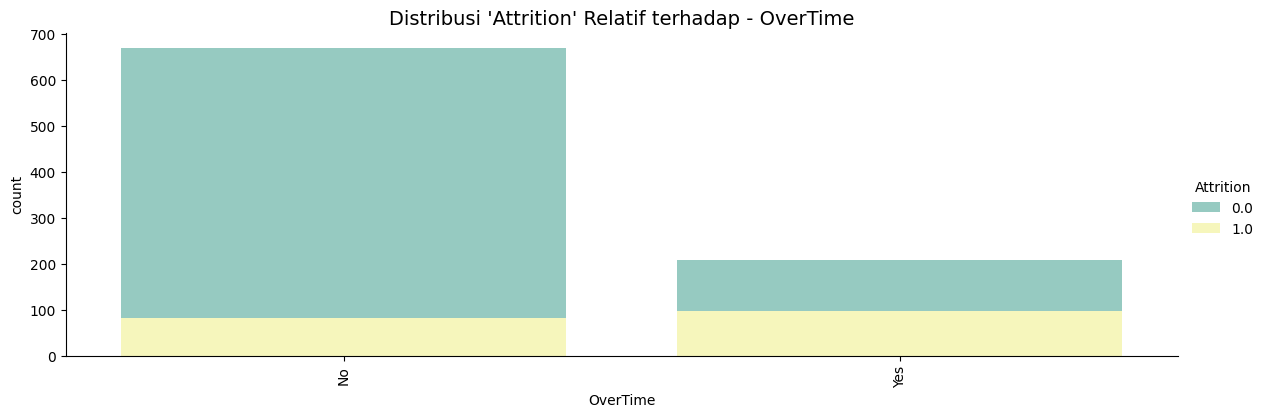

In [68]:
# Identifikasi semua fitur kategorikal dalam dataset
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Membuat plot untuk setiap fitur kategorikal relatif terhadap 'Attrition'
for col in categorical_features:
    sns.catplot(x=col, hue="Attrition", kind="count", dodge=False, height=4, aspect=3, data=df, palette="Set3")
    plt.title(f"Distribusi 'Attrition' Relatif terhadap - {col}", fontsize=14)
    plt.xticks(rotation=90)
    plt.show()

### Correlation Matrix

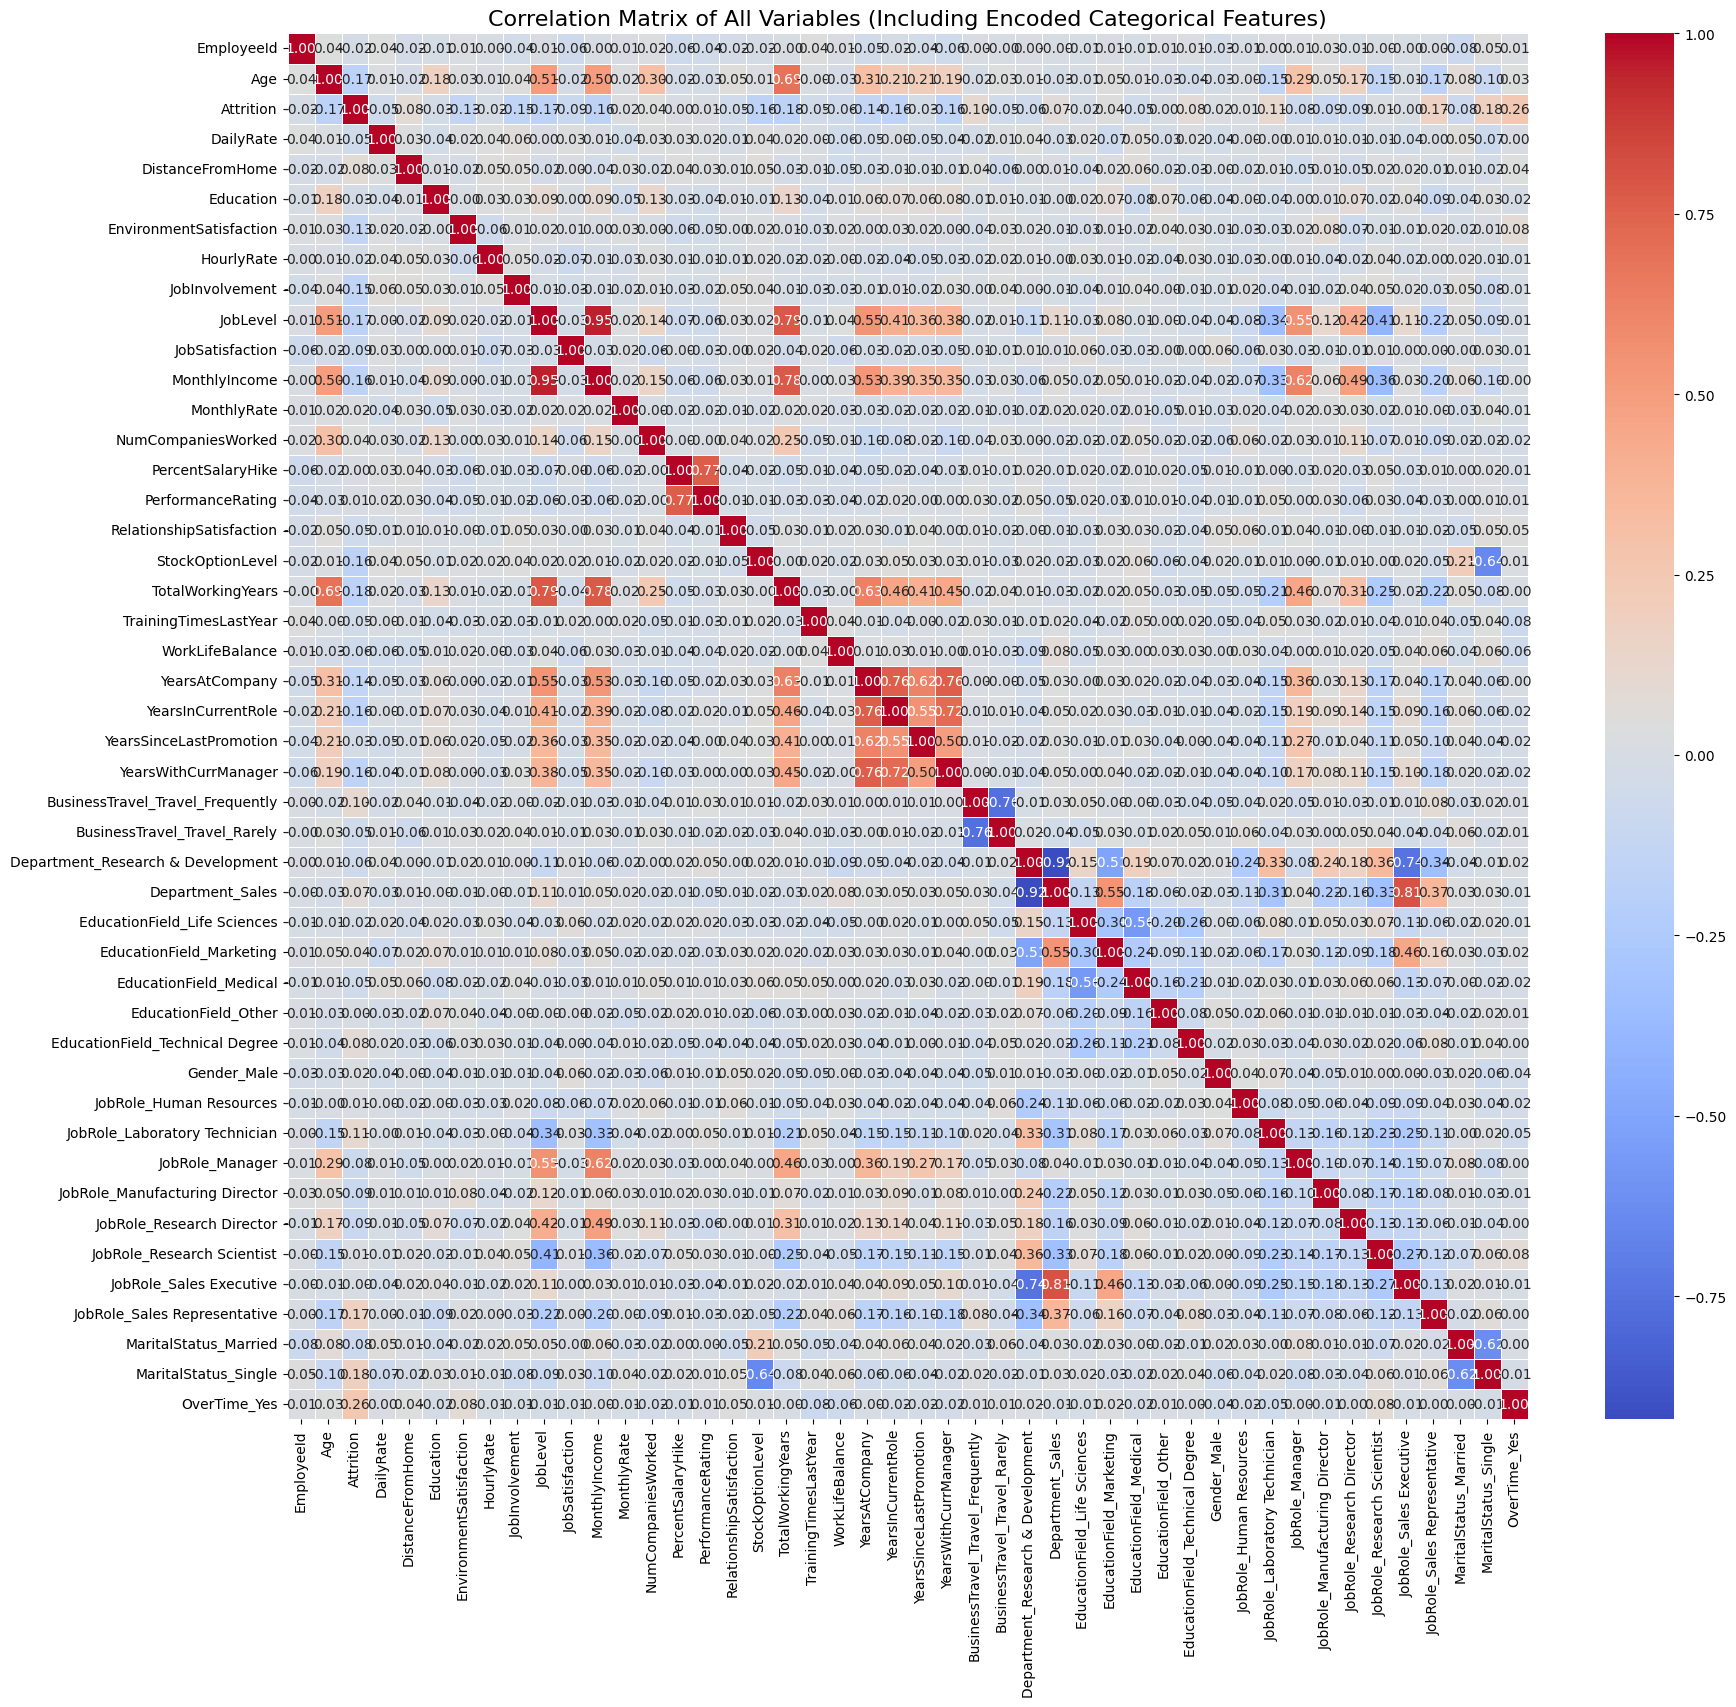

In [69]:
# Identifikasi fitur numerik dan kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = df_encoded.corr()

# Plot matriks korelasi
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of All Variables (Including Encoded Categorical Features)', fontsize=16)
plt.show()

Factors correlated with Attrition:
OverTime_Yes                         0.255856
MaritalStatus_Single                 0.184303
JobRole_Sales Representative         0.168200
JobRole_Laboratory Technician        0.113390
BusinessTravel_Travel_Frequently     0.104074
DistanceFromHome                     0.078074
EducationField_Technical Degree      0.076868
Department_Sales                     0.066083
EducationField_Marketing             0.042300
NumCompaniesWorked                   0.037429
MonthlyRate                          0.023299
Gender_Male                          0.015887
JobRole_Human Resources              0.014040
JobRole_Research Scientist           0.011259
PerformanceRating                    0.007755
PercentSalaryHike                    0.004907
EducationField_Other                 0.000197
JobRole_Sales Executive             -0.001532
HourlyRate                          -0.017524
EmployeeId                          -0.017912
EducationField_Life Sciences        -0.019287

<ipython-input-70-9abf4bd0c8ea>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_factors.values, y=top_factors.index, palette="coolwarm")


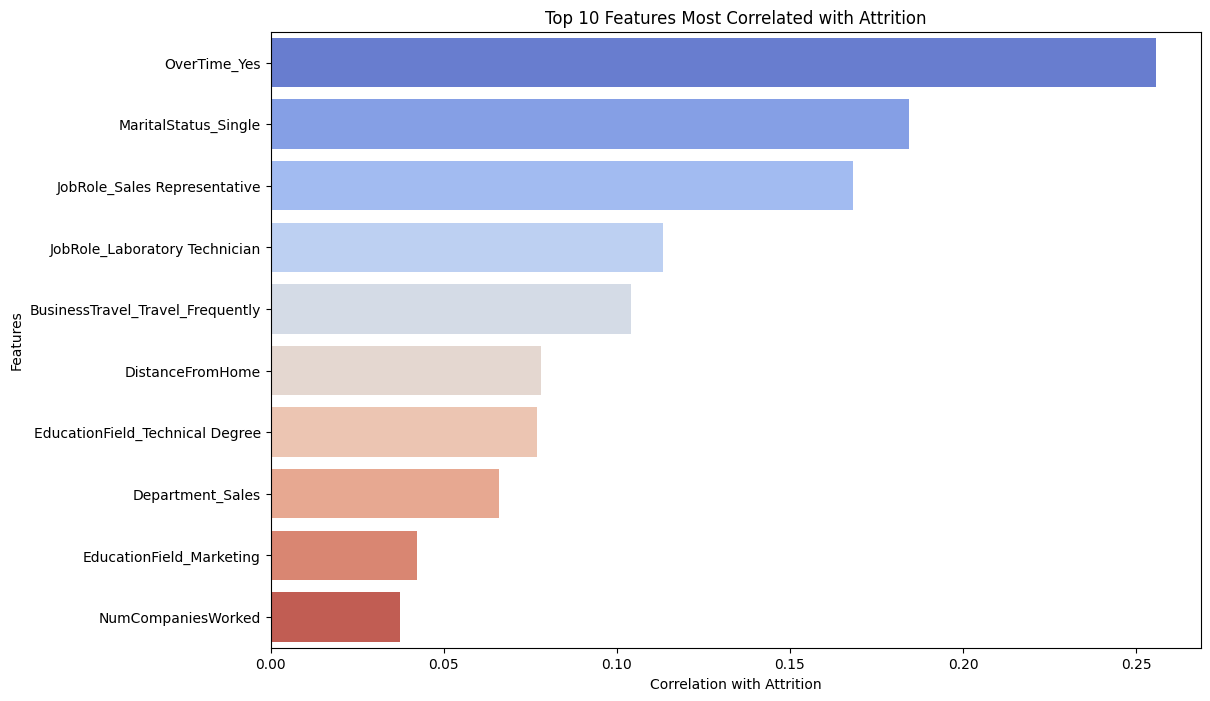

In [70]:
# Identifikasi fitur numerik dan kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = df_encoded.corr()

# Ambil korelasi dengan kolom 'Attrition'
attrition_correlation = correlation_matrix["Attrition"].sort_values(ascending=False)

# Drop 'Attrition' itself from the list
factors = attrition_correlation.drop('Attrition')

print("Factors correlated with Attrition:")
print(factors)

# Plot the top 10 correlations
top_factors = factors.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_factors.values, y=top_factors.index, palette="coolwarm")
plt.title("Top 10 Features Most Correlated with Attrition")
plt.xlabel("Correlation with Attrition")
plt.ylabel("Features")
plt.show()

Top 10 factors most correlated with Attrition:
OverTime_Yes                        0.255856
MaritalStatus_Single                0.184303
JobRole_Sales Representative        0.168200
JobRole_Laboratory Technician       0.113390
BusinessTravel_Travel_Frequently    0.104074
DistanceFromHome                    0.078074
EducationField_Technical Degree     0.076868
Department_Sales                    0.066083
EducationField_Marketing            0.042300
NumCompaniesWorked                  0.037429
Name: Attrition, dtype: float64


<ipython-input-71-4461e0f4dd2e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_factors.values, y=top_10_factors.index, palette="coolwarm")


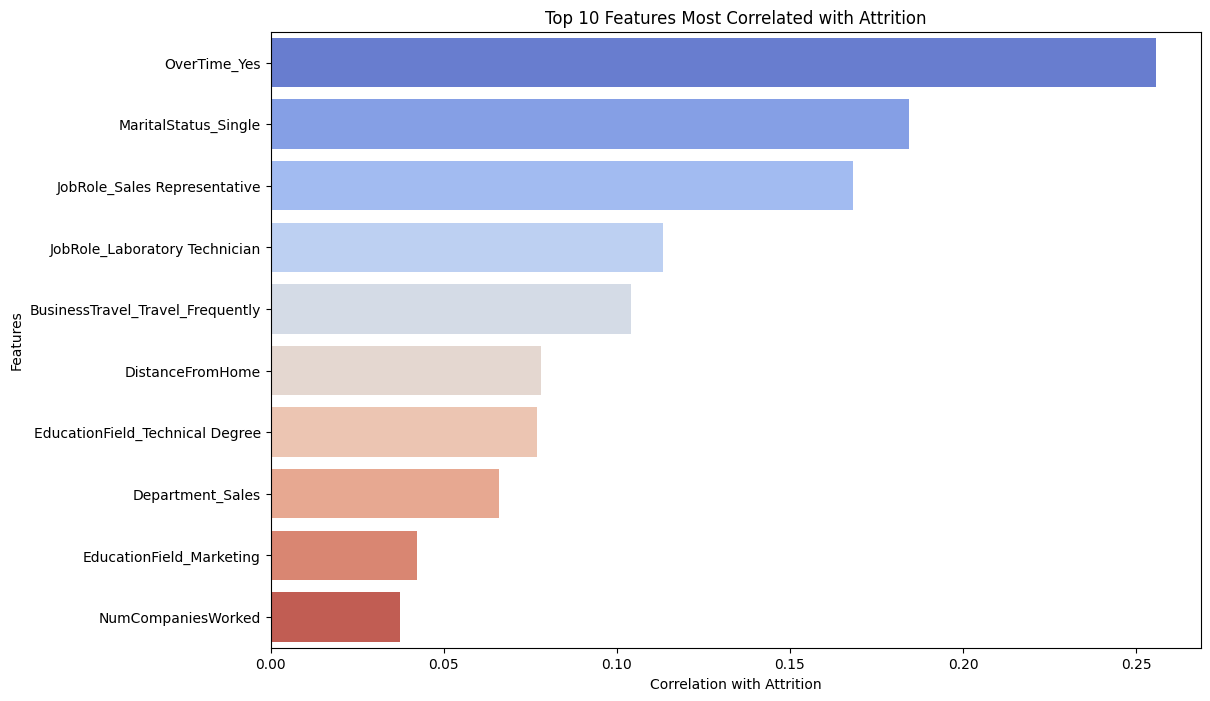

In [71]:
# Identifikasi fitur numerik dan kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = df_encoded.corr()

# Ambil korelasi dengan kolom 'Attrition'
attrition_correlation = correlation_matrix["Attrition"].sort_values(ascending=False)

# Ambil 10 fitur dengan korelasi tertinggi terhadap 'Attrition'
top_10_factors = attrition_correlation.head(11).drop('Attrition')  # Include 'Attrition' itself and then drop it

print("Top 10 factors most correlated with Attrition:")
print(top_10_factors)

# Plot the top 10 correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_factors.values, y=top_10_factors.index, palette="coolwarm")
plt.title("Top 10 Features Most Correlated with Attrition")
plt.xlabel("Correlation with Attrition")
plt.ylabel("Features")
plt.show()

## Data Preparation / Preprocessing

In [72]:
# Create a copy of the DataFrame and drop unnecessary column
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop(['EmployeeId'], axis=1)

# Identifikasi fitur numerik dan kategorikal
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'Attrition' from numerical columns if present
if 'Attrition' in numerical_columns:
    numerical_columns.remove('Attrition')

# Standardisasi fitur numerik
scaler = StandardScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# One-hot encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Mengubah nilai True dan False menjadi 1 dan 0
df_encoded = df_encoded.astype(int)

print(df_encoded.head())

   Age  Attrition  DailyRate  DistanceFromHome  Education  \
1    0          1          0                 0          0   
2    1          1          1                 0          1   
3    0          0          0                 2          0   
6    0          0          0                 0          0   
7    1          1          0                 0          0   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
1                       -1           0              -2         0   
2                       -1          -1               0         0   
3                        0           0               0         1   
6                        0           0              -2         0   
7                        1           0               0         2   

   JobSatisfaction  ...  JobRole_Laboratory Technician  JobRole_Manager  \
1                0  ...                              0                0   
2                0  ...                              0                0   

In [73]:
# Memisahkan fitur dan target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modeling

In [74]:
model = RandomForestClassifier(random_state=42)

# Latih model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

In [75]:
# Prediksi pada data uji
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluasi hasil
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_proba))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[262   1]
 [ 49   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       263
           1       0.86      0.11      0.19        55

    accuracy                           0.84       318
   macro avg       0.85      0.55      0.55       318
weighted avg       0.84      0.84      0.79       318


AUC-ROC Score: 0.7609747666781889

Accuracy Score: 0.8427672955974843


In [76]:
# Menyimpan model yang dilatih
joblib.dump(model, 'attrition_model.pkl')

['attrition_model.pkl']